# Exploratory Data Analysis

## 1. Data Description

- This dataset described whether if a user make a purchase from the social network advertisement link.
- This is a dataset that originally from [SuperDataScience](https://www.superdatascience.com) Course, [Machine Learning A-Z](https://www.superdatascience.com/pages/machine-learning). The `.zip` file can be downloaded [here](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P14-Kernel-SVM.zip)
- This dataset contains $320$ different users(observations), identified by different user id. 
- This dataset is useful for advertisement companies who want to improve the advertisement targeting model by focusing on certain people that classified by Gender, Age and Estimated Salary.

## 2. Load the Dataset

In [1]:
import datapackage
import pandas as pd
from sklearn.model_selection import train_test_split
import altair as alt 

In [2]:
data_url = 'https://datahub.io/machine-learning/blood-transfusion-service-center/datapackage.json'

# to load Data Package into storage
package = datapackage.Package(data_url)

# to load only tabular data
resources = package.resources
for resource in resources:
    if resource.tabular:
        blood_df = pd.read_csv(resource.descriptor['path'])

In [3]:
blood_df.head()

,V1,V2,V3,V4,Class
0,2,50,12500,98,2
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,1


In [4]:
X = blood_df.iloc[:,0:-1]
y = blood_df.iloc[:,-1]
# split training and testing
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, random_state = 123)

In [5]:
blood_df_train = X_train
blood_df_train = pd.merge(blood_df_train, y_train, left_index=True, right_index=True)
blood_df_train.head()

,V1,V2,V3,V4,Class
239,8,9,2250,58,1
269,13,4,1000,21,1
151,4,6,1500,39,1
245,4,5,1250,46,1
59,3,6,1500,21,1


## 3. Explore the Dataset

In [6]:
blood_df_train.isna().any()

V1       False
V2       False
V3       False
V4       False
Class    False
dtype: bool

We can see that there are no missing values in our dataset.

In [7]:
print(blood_df_train.shape)
print(blood_df_train.columns)

(598, 5)
Index(['V1', 'V2', 'V3', 'V4', 'Class'], dtype='object')


It has four columns, one of which is our target: Purchased, a binary variable with 0 being not purchased and 1 being purchased. In the three features, one is Gender which are strings and the other two are floats.

In [8]:
#general summary for all data
blood_df_train.describe()

,V1,V2,V3,V4,Class
count,598.000000,598.000000,598.000000,598.000000,598.000000
mean,9.951505,5.653846,1413.461538,35.030100,1.230769
std,8.399130,5.939018,1484.754538,24.345691,0.421678
min,0.000000,1.000000,250.000000,2.000000,1.000000
25%,4.000000,2.000000,500.000000,16.000000,1.000000
50%,9.000000,4.000000,1000.000000,28.000000,1.000000
75%,14.750000,7.000000,1750.000000,50.750000,1.000000
max,74.000000,50.000000,12500.000000,98.000000,2.000000


We can see that the mean purchased in 0.375 which is different from purchasing by chance of 0.5. This indicates that our research questions are meaningful and it is worth investigate how these three factors affect the purchase behavior.

In [9]:
#Summary for negative class, which is not purhcased
blood_df_train[blood_df_train['Class']==1].describe()

,V1,V2,V3,V4,Class
count,460.000000,460.000000,460.000000,460.000000,460.0
mean,11.315217,4.969565,1242.391304,36.121739,1.0
std,8.699697,4.908215,1227.053762,24.566267,0.0
min,0.000000,1.000000,250.000000,2.000000,1.0
25%,4.000000,2.000000,500.000000,16.000000,1.0
50%,11.000000,3.000000,750.000000,28.000000,1.0
75%,16.000000,7.000000,1750.000000,52.000000,1.0
max,74.000000,44.000000,11000.000000,98.000000,1.0


In [10]:
#Summary for negative class, which is not purhcased
blood_df_train[blood_df_train['Class']==2].describe()

,V1,V2,V3,V4,Class
count,138.000000,138.000000,138.000000,138.000000,138.0
mean,5.405797,7.934783,1983.695652,31.391304,2.0
std,5.175233,8.134998,2033.749576,23.314240,0.0
min,0.000000,1.000000,250.000000,2.000000,2.0
25%,2.000000,3.000000,750.000000,15.000000,2.0
50%,4.000000,6.000000,1500.000000,28.000000,2.0
75%,4.000000,10.000000,2500.000000,41.750000,2.0
max,26.000000,50.000000,12500.000000,98.000000,2.0


Comparing the summary for purchased vs not purchased class, we can see that the mean age and mean estimated salary are higher for purchased class. 

## 4. Data Visualizations

In [11]:
blood_df_train.columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Donated']

In [12]:
blood_df_train

,Recency,Frequency,Monetary,Time,Donated
239,8,9,2250,58,1
269,13,4,1000,21,1
151,4,6,1500,39,1
245,4,5,1250,46,1
59,3,6,1500,21,1
...,...,...,...,...,...
98,4,4,1000,14,2
322,11,4,1000,34,1
382,14,1,250,14,1
365,14,2,500,21,2


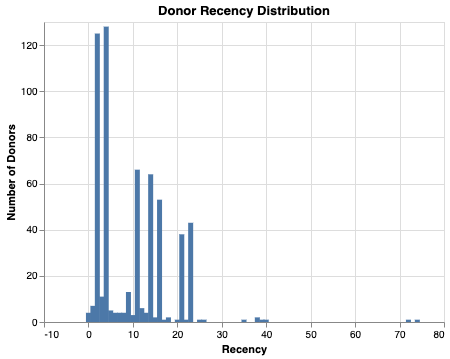

In [13]:
alt.Chart(blood_df_train).mark_bar().encode(
    alt.X("Recency"),
    alt.Y("count()", title = "Number of Donors"),
).properties(title = "Donor Recency Distribution")

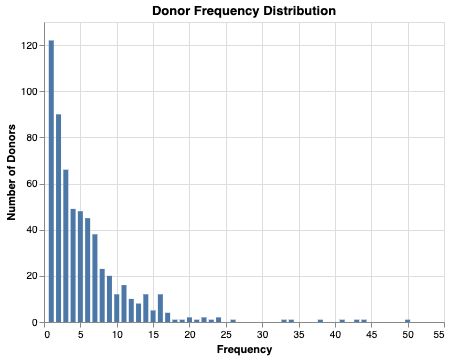

In [14]:
alt.Chart(blood_df_train).mark_bar().encode(
    alt.X("Frequency"),
    alt.Y("count()", title = "Number of Donors"),
).properties(title = "Donor Frequency Distribution")

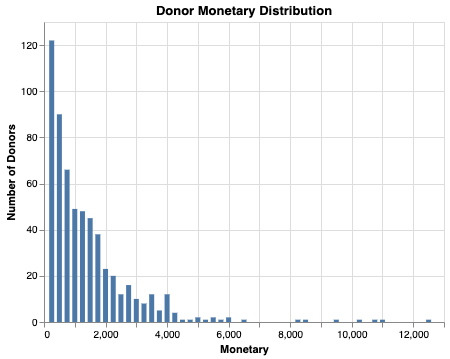

In [15]:
alt.Chart(blood_df_train).mark_bar().encode(
    alt.X("Monetary"),
    alt.Y("count()", title = "Number of Donors"),
).properties(title = "Donor Monetary Distribution")

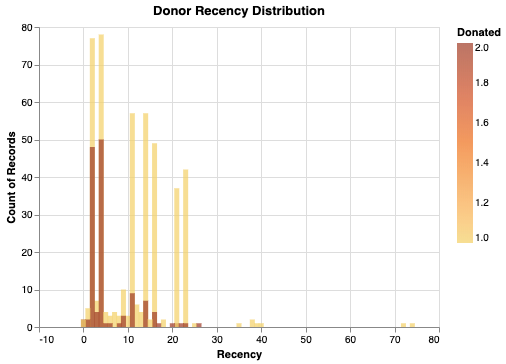

In [16]:
alt.Chart(blood_df_train).mark_bar(opacity = 0.7).encode(
    alt.X("Recency"),
    alt.Y('count()', stack=None),
    color=alt.Color('Donated', scale=alt.Scale(scheme='goldorange'))
).properties(title = "Donor Recency Distribution")

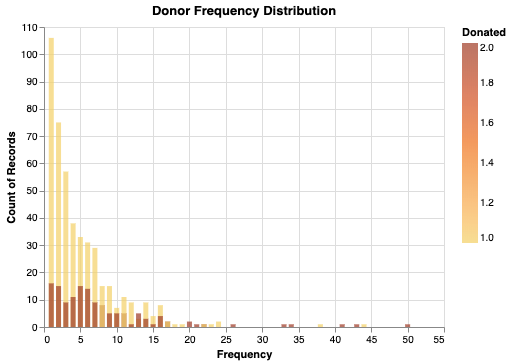

In [17]:
alt.Chart(blood_df_train).mark_bar(opacity = 0.7).encode(
    alt.X("Frequency"),
    alt.Y('count()', stack=None),
    color=alt.Color('Donated', scale=alt.Scale(scheme='goldorange'))
).properties(title = "Donor Frequency Distribution")

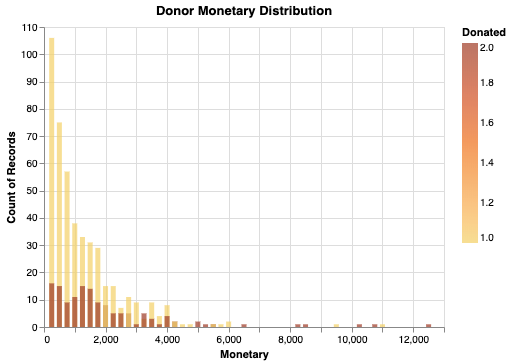

In [18]:
alt.Chart(blood_df_train).mark_bar(opacity = 0.7).encode(
    alt.X("Monetary"),
    alt.Y('count()', stack=None),
    color=alt.Color('Donated', scale=alt.Scale(scheme='goldorange'))
).properties(title = "Donor Monetary Distribution")

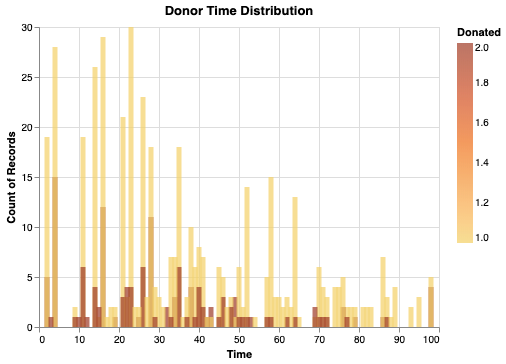

In [19]:
alt.Chart(blood_df_train).mark_bar(opacity = 0.7).encode(
    alt.X("Time"),
    alt.Y('count()', stack=None),
    color=alt.Color('Donated', scale=alt.Scale(scheme='goldorange'))
).properties(title = "Donor Time Distribution")